In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("salario.csv")

In [3]:
print("Formato do DataFrame: ", df.shape)

Formato do DataFrame:  (31101, 8)


In [4]:
df.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,122568.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,110796.0,NaN
2,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,122112.0,NaN
3,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,40.0,NaN,45.9
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,86730.0,NaN


In [5]:
df_police = df[df.Department == "POLICE"].copy()

In [6]:
print("Formato do DataFrame: ", df_police.shape)

Formato do DataFrame:  (12537, 8)


In [7]:
df_police.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,122568.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,110796.0,NaN
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,86730.0,NaN
7,"ABBATE, TERRY M",POLICE OFFICER,POLICE,F,Salary,NaN,109236.0,NaN
9,"ABBOTT, CARMELLA",POLICE OFFICER,POLICE,F,Salary,NaN,90990.0,NaN


In [8]:
df_police.columns.values

array(['Name', 'Job Titles', 'Department', 'Full or Part-Time',
       'Salary or Hourly', 'Typical Hours', 'Annual Salary',
       'Hourly Rate'], dtype=object)

In [9]:
df_police.columns = ['Name', 'Titles', 'Department', 'Full or Part-Time','Salary or Hourly', 'Typical Hours', 'Annual Salary','Hourly Rate']

In [10]:
df_police.columns.values

array(['Name', 'Titles', 'Department', 'Full or Part-Time',
       'Salary or Hourly', 'Typical Hours', 'Annual Salary',
       'Hourly Rate'], dtype=object)

In [11]:
print("--> POLICE:")
display(df_police.isnull().sum())

print("\n", "--." * 10, "\n")

--> POLICE:


Name                     0
Titles                   0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        12528
Annual Salary            9
Hourly Rate          12528
dtype: int64


 --.--.--.--.--.--.--.--.--.--. 



In [12]:
df_police = df_police[df_police['Annual Salary'].notna()]

In [13]:
print("--> POLICE:")
display(df_police.isnull().sum())

print("\n", "--." * 10, "\n")

--> POLICE:


Name                     0
Titles                   0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        12528
Annual Salary            0
Hourly Rate          12528
dtype: int64


 --.--.--.--.--.--.--.--.--.--. 



In [14]:
jobxx = df_police.Titles.unique()
print("Número de cargos: ",len(jobxx))

Número de cargos:  96


In [15]:
df_police.groupby('Titles')[['Annual Salary']].sum()

,Annual Salary
Titles,
ACCOUNTANT,281064.0
ADMINISTRATIVE ASST II,364176.0
ADMINISTRATIVE ASST III,280980.0
AREA COORD - CAPS,269040.0
ASSOCIATE STAFF ATTORNEY,64896.0
...,...
SUPERINTENDENT'S CHIEF OF STAFF,189252.0
SUPERVISING PROPERTY CUSTODIAN,170688.0
TRAINING OFFICER,1284672.0


In [16]:
df_police.groupby('Titles').size()

Titles
ACCOUNTANT                          3
ADMINISTRATIVE ASST II              5
ADMINISTRATIVE ASST III             3
AREA COORD - CAPS                   3
ASSOCIATE STAFF ATTORNEY            1
                                   ..
SUPERINTENDENT'S CHIEF OF STAFF     1
SUPERVISING PROPERTY CUSTODIAN      2
TRAINING OFFICER                   13
WARRANT AND EXTRADITION AIDE        6
YOUTH SERVICES COORD                3
Length: 96, dtype: int64

In [17]:
S_ID = df_police[df_police['Titles']!='SERGEANT'].index
SARG = df_police.drop(S_ID)

In [18]:
SAR_MED = SARG['Annual Salary'].mean()
SAR_MAX = SARG['Annual Salary'].max()
SAR_MIN = SARG['Annual Salary'].min()
print("Salário médio anual Sargento: US$ ", round(SAR_MED,2), "Salário máximo anual Sargento: US$ ", round(SAR_MAX,2),  "Salário mínimo anual Sargento: US$ ", round(SAR_MIN,2), )

Salário médio anual Sargento: US$  125823.95 Salário máximo anual Sargento: US$  130596.0 Salário mínimo anual Sargento: US$  116094.0


In [19]:
P_ID = df_police[df_police['Titles']!='POLICE OFFICER'].index
POLO = df_police.drop(P_ID)
POLO_MED = POLO['Annual Salary'].mean()
POLO_MAX = POLO['Annual Salary'].max()
POLO_MIN = POLO['Annual Salary'].min()
print("Salário médio anual policial: US$ ", round(POLO_MED,2), "Salário máximo anual policial: US$ ", round(POLO_MAX,2),  "Salário mínimo anual policial: US$ ", round(POLO_MIN,2), )

Salário médio anual policial: US$  96396.93 Salário máximo anual policial: US$  109236.0 Salário mínimo anual policial: US$  54672.0


In [20]:
m = pd.concat([POLO, SARG])
m = m.drop(['Typical Hours','Department','Full or Part-Time','Hourly Rate','Salary or Hourly'], axis=1)
m.reset_index(inplace=True, drop=True)
m

,Name,Titles,Annual Salary
0,"ABARCA, FRANCES J",POLICE OFFICER,86730.0
1,"ABBATE, TERRY M",POLICE OFFICER,109236.0
2,"ABBOTT, CARMELLA",POLICE OFFICER,90990.0
3,"ABDALLAH, ZAID",POLICE OFFICER,95586.0
4,"ABDELHADI, ABDALMAHD",POLICE OFFICER,102372.0
...,...,...,...
10049,"YOUSIF, EVAN F",SERGEANT,122568.0
10050,"ZAPATA, JOSHUA",SERGEANT,122568.0
10051,"ZATORA, TOMASZ M",SERGEANT,118836.0
10052,"ZATTAIR, NICK",SERGEANT,130596.0


In [32]:
y1 = m.groupby('Titles')['Annual Salary'].mean()
y2 = m.groupby('Titles')['Annual Salary'].max()
y3 = m.groupby('Titles')['Annual Salary'].min()
y1

Titles
POLICE OFFICER     96396.930149
SERGEANT          125823.952462
Name: Annual Salary, dtype: float64

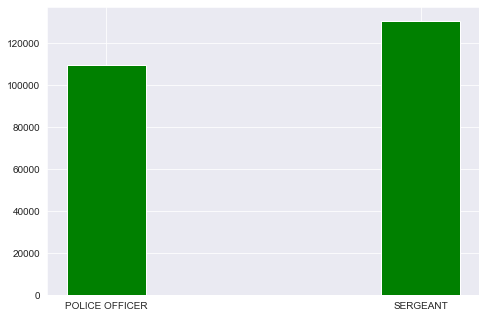

In [48]:
sns.set_style('darkgrid')
x = m.Titles.unique()
y1 = m.groupby('Titles')['Annual Salary'].mean()
y2= m.groupby('Titles')['Annual Salary'].max()
#y3= m.groupby('Titles')['Annual Salary'].min()
#ax = sns.barplot(x, y1)
#ax = sns.barplot(x, y2)
#ax = sns.barplot(x=cargo, y2=POLO_MAX)
#ax = df.plot.bar(x='Titles', y='Annual Salary', rot=0)
#plt.xticks(rotation=0)
#plt.legend(title="Average Pay")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y1, width = 0.15)
ax.bar(x,y2, color = 'g', width = 0.25)
#ax.bar(x ,y3, color = 'r', width = 0.25)
#plt.plot(x, y3, color=[0.8, 0.1, 0.3], label='Lower Limit')
#m.plot(kind="bar")
plt.show()

No handles with labels found to put in legend.


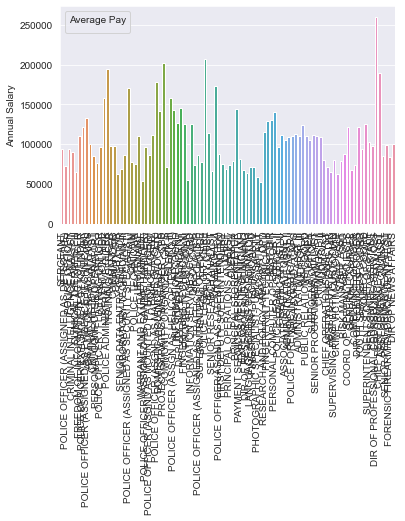

In [23]:
jobxx = df_police.Titles.unique()
salary_police_mean = df_police.groupby('Titles')['Annual Salary'].mean()
ax = sns.barplot(x=jobxx, y=salary_police_mean)
plt.xticks(rotation=90)
plt.legend(title="Average Pay")
plt.show()

In [24]:
msalary = df_police['Annual Salary'].mean()
maxsalary = df_police['Annual Salary'].max()
minsalary = df_police['Annual Salary'].min()
print("Média de salário: ", msalary, "Máximo de salário: " , maxsalary, "Mínimo de salário: ", minsalary)

Média de salário:  101424.9442816092 Máximo de salário:  260004.0 Mínimo de salário:  46188.0


No handles with labels found to put in legend.


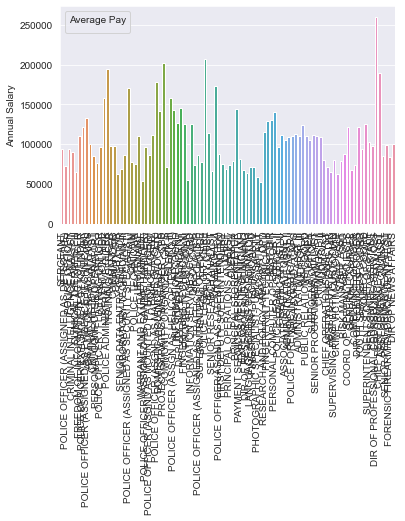

In [25]:
salary_police_mean = df_police.groupby('Titles')['Annual Salary'].mean()
ax = sns.barplot(x=jobxx, y=salary_police_mean)
plt.xticks(rotation=90)
plt.legend(title="Average Pay")
plt.show()